In [1]:
import os
import sys
import pylab
import torch

sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')  ) )

import numpy
import jammy_flows
import jammy_flows.helper_fns.plotting.general as plot_fns
import jammy_flows.helper_fns.plotting.spherical as spherical_plot_fns

import random
def seed_everything(seed_no):
    random.seed(seed_no)
    numpy.random.seed(seed_no)
    torch.manual_seed(seed_no)
    
seed_everything(3)


## A few examples how to construct PDFs. For 2-d PDFs the contours are shown using the exact PDF evaluations (black) and from samples (white).

### 2-d pdf euclidean pdf ("e2") with 2 gaussianization-flow layers ("gg")

sub-manifold (0 - e2 - gg) and intra-manifold flow (0 - g) - using *default* options
sub-manifold (0 - e2 - gg) and intra-manifold flow (1 - g) - using *default* options
tensor(63)  items did not converge in Newton iterations
feval (diff)  tensor([-0.0001,  0.0001, -0.0002, -0.0003,  0.0035, -0.0001,  0.0001,  0.0001,
         0.0004,  0.0007,  0.0007, -0.0002,  0.0003, -0.0007,  0.0005,  0.0131,
        -0.0001,  0.0001, -0.0002, -0.0065,  0.0001,  0.0001,  0.0003,  0.0002,
        -0.0004, -0.0024,  0.0011, -0.0001,  0.0001,  0.0002, -0.0001,  0.0005,
        -0.0001,  0.0002, -0.0002, -0.0003,  0.0001, -0.0002, -0.0001,  0.0001,
         0.0002, -0.0001, -0.0001,  0.0001,  0.0002,  0.0002,  0.0002,  0.0001,
         0.0005,  0.0032,  0.0001, -0.0002, -0.0010, -0.0002,  0.0001, -0.0002,
         0.0001,  0.0004,  0.0003, -0.0002, -0.0029, -0.0001, -0.0003])


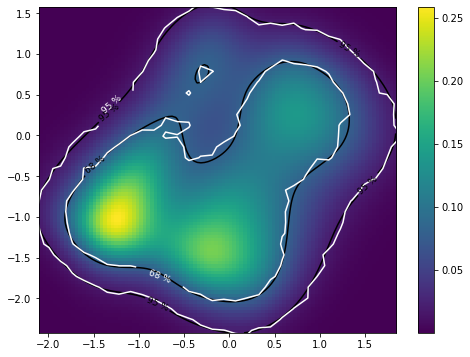

In [2]:

fived_pdf=jammy_flows.pdf("e2", "gg")

fig=pylab.figure(figsize=(8,6))
_, _,_=plot_fns.visualize_pdf(fived_pdf,fig,nsamples=100000)

## floating precision is often not enough, as can be seen as the non convergence below,
## which shows slight inaccuracies for sampling

### change to double precision to remove warnings

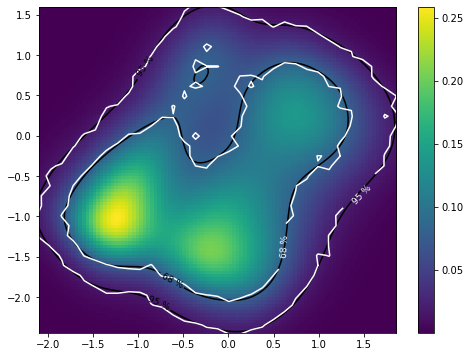

In [3]:
fived_pdf.double()

fig=pylab.figure(figsize=(8,6))
_, _,_=plot_fns.visualize_pdf(fived_pdf,fig,nsamples=100000)


### 2-d spherical PDF plotted in zenith/azimuth .. the PDF in this plot is defined in *intrinsic* coordinates (zenith/azimuth), and its values do not correctly describe PDF values on the sphere (in *extrinsic* or *embedding* coordinates).. it is useful though for multi-dimensional plots

sub-manifold (0 - s2 - nn) and intra-manifold flow (0 - n) - using *default* options
sub-manifold (0 - s2 - nn) and intra-manifold flow (1 - n) - using *default* options
ZENITH TYPE LAYERS  r
ZENITH TYPE LAYERS  r


Text(0, 0.5, '$\\phi$')

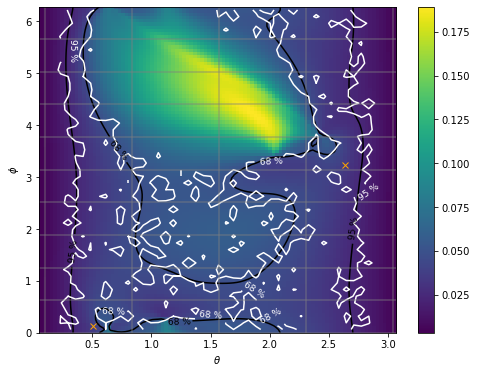

In [4]:
twod_spherical_pdf=jammy_flows.pdf("s2", "nn")
twod_spherical_pdf.double()
fig=pylab.figure(figsize=(8,6))

_, _,_=plot_fns.visualize_pdf(twod_spherical_pdf,fig,nsamples=100000)
pylab.gca().set_xlabel(r"$\theta$")
pylab.gca().set_ylabel(r"$\phi$")

### The same spherical PDF with an (area-preserving) lambert projection.

Text(0, 0.5, '$l_1$')

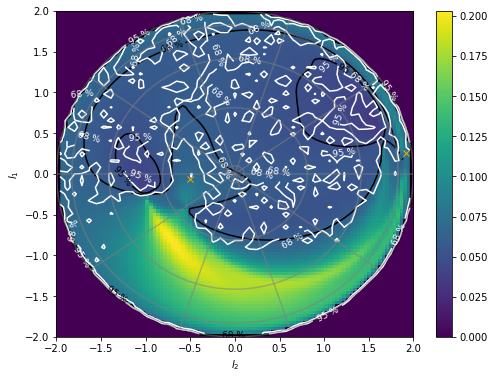

In [5]:
fig=pylab.figure(figsize=(8,6))

_, _,_=plot_fns.visualize_pdf(twod_spherical_pdf,fig,nsamples=100000, contours=[0.68],s2_norm="lambert", bounds=[[-2,2],[-2,2]])
pylab.gca().set_xlabel(r"$l_2$")
pylab.gca().set_ylabel(r"$l_1$")

### Another *correct* way to plot the PDF is using a healpix grid. The following shows the same spherical PDF plotted with an adaptive healpix grid (mollweide + orthographic projection/zoom)

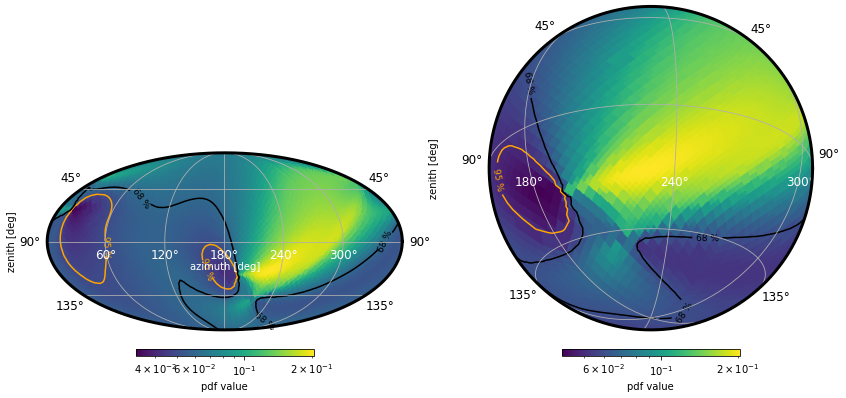

In [6]:
fig, axgrid=pylab.subplots(1,2, figsize=(14,7))


ax_obj1=spherical_plot_fns.plot_multiresolution_healpy(twod_spherical_pdf, 
                                               fig=fig,
                                               ax_to_plot=axgrid[0],
                                              contour_probs=[0.68,0.95],
                                               contour_colors=["black", "orange"]
                                              )

## zoom=True leads to orthographic projection
ax_obj=spherical_plot_fns.plot_multiresolution_healpy(twod_spherical_pdf, 
                                               fig=fig,
                                               ax_to_plot=axgrid[1],
                                               contour_probs=[0.68,0.95],
                                                      contour_colors=["black", "orange"],
                                               zoom=True)



### 5-d conditional PDF jointly defined over the 1-sphere (circle), 2-sphere, and 2-dim Euclidean space. Visualization for two different inputs shown. At initialization, conditional PDFs are initilialized such that the input has little influence on the final shape, so input is varied alot.

sub-manifold (0 - s1 - m) and intra-manifold flow (0 - m) - using *default* options
sub-manifold (1 - s2 - v) and intra-manifold flow (0 - v) - using *default* options
sub-manifold (2 - e2 - gggg) and intra-manifold flow (0 - g) - using *default* options
sub-manifold (2 - e2 - gggg) and intra-manifold flow (1 - g) - using *default* options
sub-manifold (2 - e2 - gggg) and intra-manifold flow (2 - g) - using *default* options
sub-manifold (2 - e2 - gggg) and intra-manifold flow (3 - g) - using *default* options


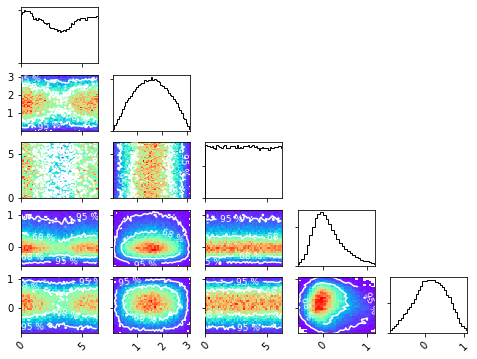

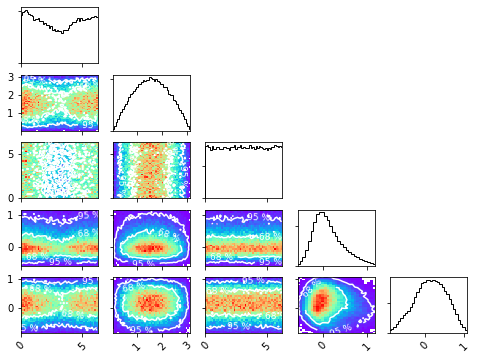

In [7]:
fived_pdf=jammy_flows.pdf("s1+s2+e2", "m+v+gggg", conditional_input_dim=2)
fived_pdf.double()
fig=pylab.figure(figsize=(8,6))
_, _,_=plot_fns.visualize_pdf(fived_pdf,fig,nsamples=100000, conditional_input=torch.Tensor([1.0,2.0]).type(torch.float64).unsqueeze(0) )

fig=pylab.figure(figsize=(8,6))
_, _,_=plot_fns.visualize_pdf(fived_pdf,fig,nsamples=100000, conditional_input=torch.Tensor([10000.0,10000.0]).type(torch.float64).unsqueeze(0) )

### 1-d conditional PDF defined on an interval from -5.5 to 10.0. At initialization, conditional PDFs are initilialized such that the input has little influence on the final shape, so the PDFs are basically flat

sub-manifold (0 - i1_-5.5_10.0 - r) and intra-manifold flow (0 - r) - using *default* options


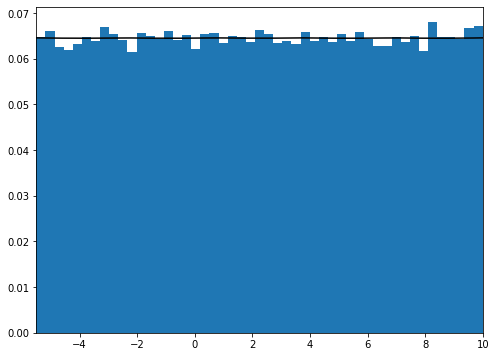

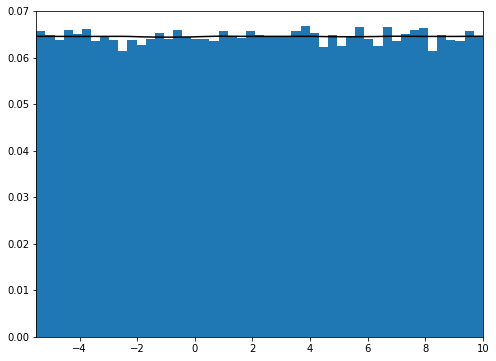

In [8]:
interval_pdf=jammy_flows.pdf("i1_-5.5_10.0", "r", conditional_input_dim=2)
interval_pdf.double()

fig=pylab.figure(figsize=(8,6))
_, _,_=plot_fns.visualize_pdf(interval_pdf,fig,nsamples=100000, conditional_input=torch.Tensor([100.0,150.0]).type(torch.float64).unsqueeze(0) )

fig=pylab.figure(figsize=(8,6))
_, _,_=plot_fns.visualize_pdf(interval_pdf,fig,nsamples=100000, conditional_input=torch.Tensor([10000.0,10000.0]).type(torch.float64).unsqueeze(0) )